# Air passengers forecasting
[Source](https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000#:~:text=Time%20series%20forecasting%20is%20basically,your%20data%20in%20serially%20correlated.&text=Pandas%20in%20python%20has%20libraries,to%20handling%20time%20series%20object%20.)

[Data](https://www.kaggle.com/rakannimer/air-passengers)

# Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
%matplotlib inline

# data_processing()
from datetime import datetime

# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

# User-Defined functions

In [7]:
class AirPassengers_Data():
    def __init__(self):
        self.raw_data = pd.read_csv('AirPassengers.csv')
        
        print(self.raw_data.head())
        print('\n Data Types:')
        print(self.raw_data.dtypes)
        
    def data_processing(self):
        
        data = self.raw_data
        
        con=data['Month']
        data['Month']=pd.to_datetime(data['Month'])
        data.set_index('Month', inplace=True)
        
        return data['#Passengers']

In [33]:
def test_stationarity(timeseries, window = 12):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean() #pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(window).std() #pd.rolling_std(timeseries, window=12)
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Data

In [26]:
main_data = AirPassengers_Data()
ts = main_data.data_processing()

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [ ]:
# Obtener un valor de la serie
ts['1949-01-01']

# Indicar la fecha 
ts[datetime(1949,1,1)]

# Obtener un rango de fechas
ts['1949-01-01':'1949-05-01']
#ts[:'1949-05-01']

# Todo el año 1949
ts['1950']

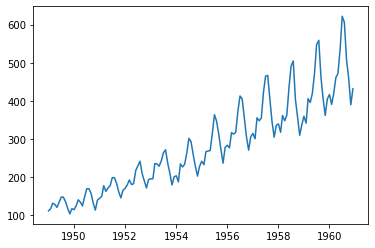

In [17]:
# plot the original series
plt.plot(ts)

### Stationarity

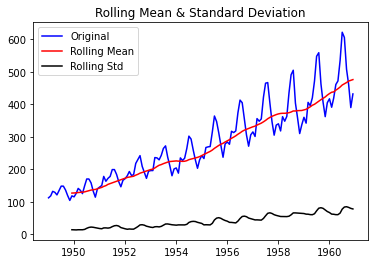

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [22]:
test_stationarity(ts)

## Making the time series stationary

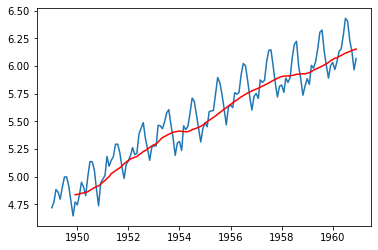

In [34]:
# Log data
ts_log = np.log(ts)
# Moving Average
moving_avg = ts_log.rolling(12).mean()

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [32]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

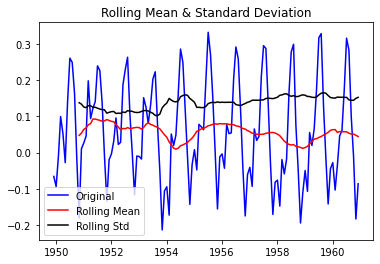

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [31]:
test_stationarity(ts_log_moving_avg_diff)

In [ ]:
#exp_weighted_avg = ts_log.ewm(halflife=12)
#plt.plot(ts_log)
#plt.plot(exp_weighted_avg,color='red')

In [ ]:
# the difference of the value at a particular time with that of the previous time
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
plt.subplot(411)
plt.plot(ts_log,label='Original')
plt.legend(loc='best')

In [ ]:
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

In [ ]:
plt.subplot(412)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

In [ ]:
plt.subplot(412)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

In [ ]:
# Remove the trend and seasonality from the Time series
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

In [ ]:
# plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [ ]:
# plot PACF
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

### AR Model

In [ ]:
model = ARIMA(ts_log,order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

In [ ]:
model = ARIMA(ts_log,order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

In [ ]:
model = ARIMA(ts_log,order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Show predictions in the original time series

In [ ]:
#get the predicted values and store it as series
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_ARIMA_diff

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum

In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

In [ ]:
# plot the predicted values
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))